In [1]:
import numpy as np
import pde

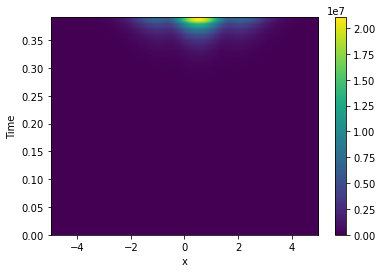

In [107]:
grid = pde.CartesianGrid([[-5, 5],], [128,], periodic=True)

# field = pde.ScalarField.from_expression(grid, "4 / (exp(x) + exp(-x))")
field = pde.ScalarField.from_expression(grid, "heaviside(x,1) - heaviside(x-1,1)")
# field.laplace("periodic")
# bc = {'value': 3}


# eq = pde.PDE({"h": "2*laplace(h)"})
# eq = pde.PDE({"h": "I * (laplace(h) / 2) + I * h * (h**2)"})
eq = pde.PDE({"h": "I * (laplace(h) / 2)"})

# bcs = [{"value": "2 / (exp(y-pi) + exp(pi-y))"}, {"value": "sin(x)"}]

storage = pde.MemoryStorage()

# res = eq.solve(field, t_range=np.pi/8, dt=1e-3, tracker=["progress", storage.tracker(1e-2)])
res = eq.solve(field, t_range=np.pi/8, dt=1e-3, tracker=storage.tracker(1e-2))

pde.plot_kymograph(storage)